In [1]:
import pandas as pd
basketball = pd.read_csv('https://raw.githubusercontent.com/evapanizo/IronHack-Data-Module-2/master/27.-Network-Analysis/data/us_mens_basketball.csv', sep=',')

In [2]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [3]:
!pip install networkx

In [4]:
!pip install python-louvain

In [5]:
import networkx as nx
import community
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,7)

# 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

In [6]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [7]:
def df_to_graph(df, entity, edge):
    ''' Transform a dataframe into another dataframe suitable to work with graphs.'''
    graph_df = pd.merge(df, df, how='inner', on=edge)
    graph_df = graph_df.groupby([f'{entity}_x', f'{entity}_y']).count().reset_index()
    graph_df = graph_df.query(f'{entity}_x != {entity}_y')

    if type(edge) == list:
        graph_df = graph_df.loc[:, [entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df.loc[:, [entity + '_x', entity + '_y', edge]]
    
    return graph_df.rename(columns={f'{entity}_x':f'{entity}_src', 
                                    f'{entity}_y':f'{entity}_dest'})



In [8]:
data = df_to_graph(basketball,'Name','Games')


In [9]:
data.head(2)

,Name_src,Name_dest,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1


In [10]:
#peguei do lab, nao tinha aqui 
# Visualisation helper function
def view_graph(G):
    """
    View graph is a helper function that takes a graph G and plot its contents.
    """
    
    print(f'Nodes in graph: {G.nodes}')
    print(f'Edges in graph: {G.edges}')
    
    # Create a visualisation using NetworkX and draw using matplotlib
    pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True)
    plt.show()

# 2. Use the from_pandas_edgelist method to turn the data frame into a graph.

In [97]:
G = nx.from_pandas_edgelist(data, source='Name_src', target='Name_dest', create_using=nx.Graph)
#G = nx.from_pandas_edgelist(data, 'Name_src', 'Name_dest', create_using=nx.DiGraph)

Nodes in graph: ['Adrian Delano Dantley', 'Ernest "Ernie" Grunfeld', 'Kenneth Alan "Kenny" Carr', 'Michel Taylor "Tate" Armstrong', 'Mitchell William "Mitch" Kupchak', 'Philip Jackson "Phil" Ford, Jr.', 'Phillip Gregory "Phil" Hubbard', 'Scott Glenn May', 'Steven Bernard "Steve" Sheppard', 'Thomas Joseph "Tom" LaGarde', 'Walter Paul Davis', 'William Quinn Buckner', 'Adrian Howard Smith', 'Burdette Eliele "Burdie" Haldorson', 'Darrall Tucker Imhoff', 'Earl Allen Kelley', 'Jay Joseph Hoyland Arnette', 'Jerome Alan "Jerry" West', 'Jerry Ray Lucas', 'Lester Everett "Les" Lane', 'Oscar Palmer Robertson', 'Robert Lewis "Bob" Boozer', 'Terence Gilbert "Terry" Dischinger', 'Walter Jones "Walt" Bellamy, Jr.', 'Alexander John "Alex" Groza', 'Clifford Eugene "Cliff" Barker', 'Donald Argee "Don" Barksdale', 'Gordon C. Carpenter', 'Jesse Banard Renick', 'Kenneth Herman "Kenny" Rollins', 'Lewis William "Lew" Beck, Jr.', 'Ralph Milton Beard, Jr.', 'Raymond George "Ray" Lumpp', 'Robert Albert "Bob" Ku

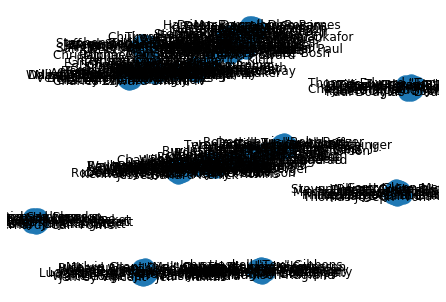

In [12]:
view_graph(G)

# 3. Compute and print the following graph statistics for the graph:¶


* Number of nodes
* Number of edges
* Average degree
* Density

In [13]:
Number_of_nodes = G.order()
# or Number_of_nodes = len(G.nodes)

Number_of_edges = G.size()
#Number_of_edges = len(G.edges)

Average_degree = sum(dict(G.degree()).values())/G.order()
#Average_degree = np.mean(list(dict(G.degree).values()))

Density = nx.density(G)

# 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [14]:
betweenness = nx.betweenness_centrality(G)

betweenness
betweenness = pd.DataFrame.from_dict(betweenness, orient='index').reset_index()
betweenness.columns = ['Node', 'Betweenness Centrality']
betweenness.sort_values('Betweenness Centrality', ascending=False).head()

,Node,Betweenness Centrality
41,Gary Dwayne Payton,0.091938
42,Jason Frederick Kidd,0.091356
53,Carmelo Kyan Anthony,0.047423
86,David Maurice Robinson,0.032662
119,"William Marion ""Bill"" Hougland",0.030241


# 5. Compute PageRank centrality for the graph and print the top 5 nodes with the highest centrality.

In [15]:
pagerank = nx.pagerank(G)

pagerank = pd.DataFrame.from_dict(pagerank, orient='index').reset_index()
pagerank.columns = ['Node', 'PageRank Centrality']
pagerank.sort_values('PageRank Centrality', ascending=False).head()

,Node,PageRank Centrality
53,Carmelo Kyan Anthony,0.012578
86,David Maurice Robinson,0.009965
33,"Robert Albert ""Bob"" Kurland",0.009114
57,LeBron Raymone James,0.009085
119,"William Marion ""Bill"" Hougland",0.008851


# 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.¶


In [16]:
degree = nx.degree_centrality(G)
degree = pd.DataFrame.from_dict(degree, orient='index').reset_index()
degree.columns = ['Node', 'Degree Centrality']
degree.sort_values('Degree Centrality', ascending=False).head()

,Node,Degree Centrality
53,Carmelo Kyan Anthony,0.184615
86,David Maurice Robinson,0.143590
33,"Robert Albert ""Bob"" Kurland",0.133333
57,LeBron Raymone James,0.133333
119,"William Marion ""Bill"" Hougland",0.123077


# 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

Look for nx.draw_kamada_kawai for reference. 


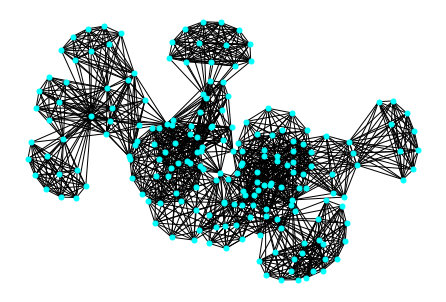

In [17]:
nx.draw_kamada_kawai(G, node_size=25, node_color='cyan')

# 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

nx.ego_graph will help you visualize a graph centered at some node.

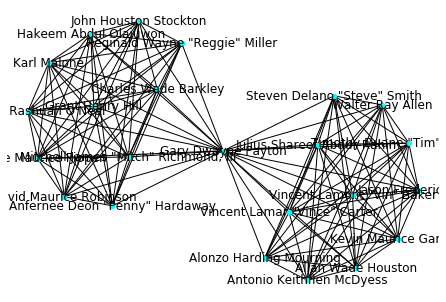

In [18]:
ego = nx.ego_graph(G, 'Gary Dwayne Payton', radius=1)
nx.draw_kamada_kawai(ego, node_size=20, node_color='cyan', with_labels=True)

# 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.


In [114]:
#!pip install pyvis

In [115]:
import community as cm
from pyvis.network import Network

In [116]:
g = Network(notebook=True)
G = nx.from_pandas_edgelist(data, source='Name_src', target='Name_dest', create_using=nx.Graph)
g.from_nx(G)
g.show('test.html', )

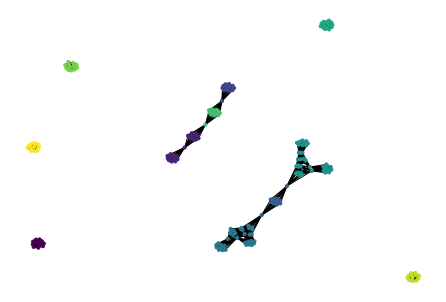

In [110]:
G = nx.from_pandas_edgelist(data, source='Name_src', target='Name_dest', create_using=nx.Graph)
best_part = cm.best_partition(G, random_state=7)

pos = nx.spring_layout(G)

nx.draw(G, pos=pos, node_color=[value for value in best_part.values()], node_size=10,
       )#with_labels=True)


plt.show()

In [52]:
n=0
[value for value in best_part.items() if value[1] ==n]

[('Adrian Delano Dantley', 0),
 ('Ernest "Ernie" Grunfeld', 0),
 ('Kenneth Alan "Kenny" Carr', 0),
 ('Michel Taylor "Tate" Armstrong', 0),
 ('Mitchell William "Mitch" Kupchak', 0),
 ('Philip Jackson "Phil" Ford, Jr.', 0),
 ('Phillip Gregory "Phil" Hubbard', 0),
 ('Scott Glenn May', 0),
 ('Steven Bernard "Steve" Sheppard', 0),
 ('Thomas Joseph "Tom" LaGarde', 0),
 ('Walter Paul Davis', 0),
 ('William Quinn Buckner', 0)]

In [55]:
list_of_name_src = [value[0] for value in best_part.items() if value[1] ==n]

In [66]:
data[data['Name_src'].apply(lambda x : x in list_of_name_src)]

,Name_src,Name_dest,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1
...,...,...,...
2630,William Quinn Buckner,"Phillip Gregory ""Phil"" Hubbard",1
2631,William Quinn Buckner,Scott Glenn May,1
2632,William Quinn Buckner,"Steven Bernard ""Steve"" Sheppard",1
2633,William Quinn Buckner,"Thomas Joseph ""Tom"" LaGarde",1


In [72]:
set(best_part.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [74]:
from tqdm.auto import tqdm

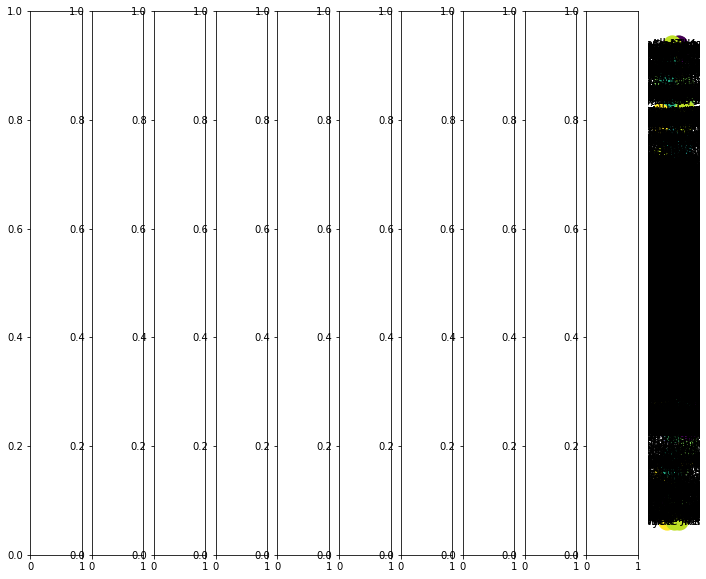

In [77]:

G = nx.from_pandas_edgelist(data, source='Name_src', target='Name_dest', create_using=nx.Graph)

fig, ax = plt.subplots(nrows=1, ncols=11,figsize=(12,10))

for n in tqdm(range(0,len(set(best_part.values())))):
    list_of_name_src = [value[0] for value in best_part.items() if value[1] ==n]
    data[data['Name_src'].apply(lambda x : x in list_of_name_src)]
    pos = nx.spring_layout(G)
    ax[n] = nx.draw(G, pos=pos, node_color=[value for value in best_part.values()], with_labels=True)

plt.show()

In [83]:
data[data['Name_src'].apply(lambda x : x in list_of_name_src)]

,Name_src,Name_dest,Games
835,"George ""Jiff"" Wilson","Jeffrey Vincent ""Jeff"" Mullins",1
836,"George ""Jiff"" Wilson",Jerry Franklin Shipp,1
837,"George ""Jiff"" Wilson","John Paul ""Pete"" McCaffrey",1
838,"George ""Jiff"" Wilson","Joseph Louis ""Joe"" Caldwell",1
839,"George ""Jiff"" Wilson","Lawrence Harvey ""Larry"" Brown",1
...,...,...,...
2642,"William Warren ""Bill"" Bradley","Lucious Brown ""Luke"" Jackson, Jr.",1
2643,"William Warren ""Bill"" Bradley","Melvin Grant ""Mel"" Counts",1
2644,"William Warren ""Bill"" Bradley","Richard Allen ""Dick"" Davies",1
2645,"William Warren ""Bill"" Bradley","Velvet James ""Jim"" Barnes",1


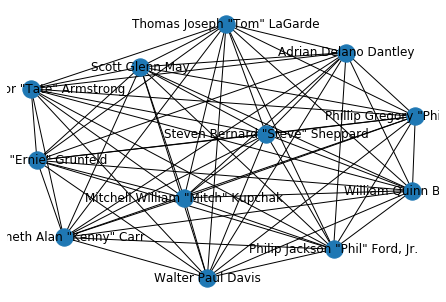

------------------------------------------------------


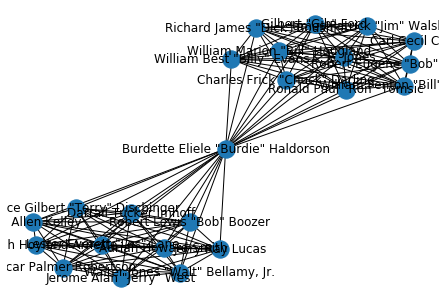

------------------------------------------------------


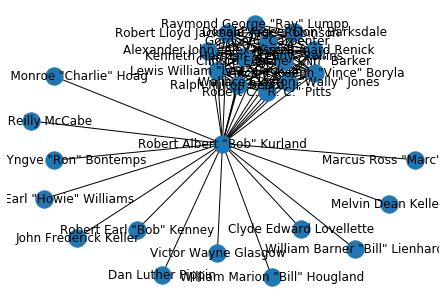

------------------------------------------------------


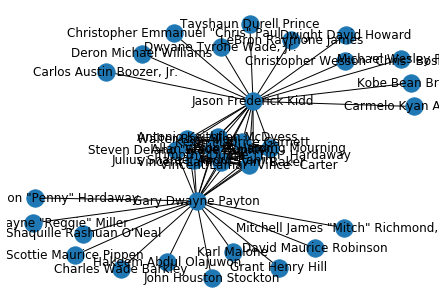

------------------------------------------------------


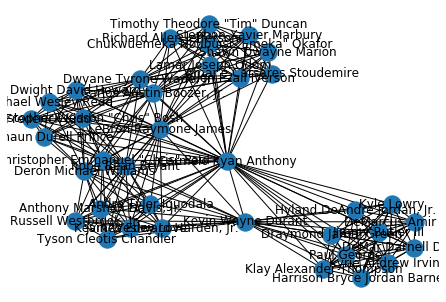

------------------------------------------------------


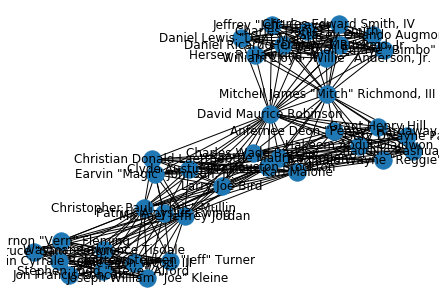

------------------------------------------------------


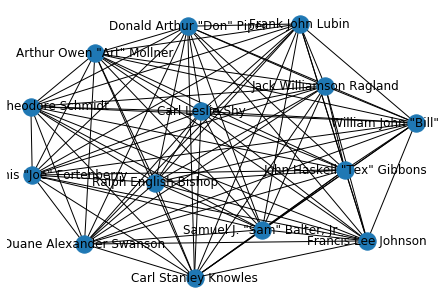

------------------------------------------------------


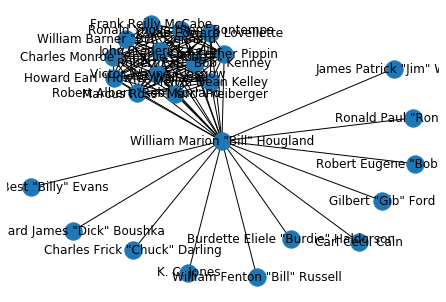

------------------------------------------------------


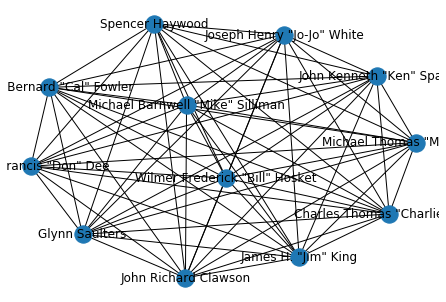

------------------------------------------------------


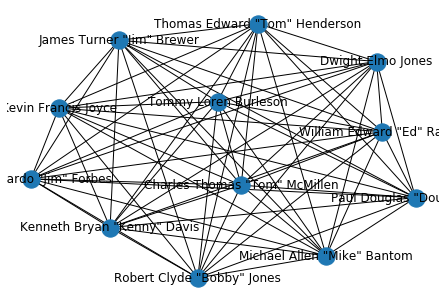

------------------------------------------------------


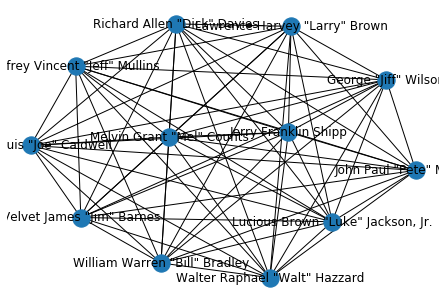

------------------------------------------------------



In [94]:
#fig, ax = plt.subplots(nrows=1, ncols=11,figsize=(12,10))

for n in tqdm(range(0,len(set(best_part.values())))):
    list_of_name_src = [value[0] for value in best_part.items() if value[1] ==n]
    data2 = data[data['Name_src'].apply(lambda x : x in list_of_name_src)]
    G = nx.from_pandas_edgelist(data2, source='Name_src', target='Name_dest', create_using=nx.Graph)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True)
    plt.show()
    print('------------------------------------------------------')